In [110]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
import datetime

#Avoiding Type 3 fonts in matplotlib plots
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [133]:
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=2.0)
matplotlib.rc('lines', markersize=8)

In [164]:
res='results/'

### MiD data
mobilität in deutschland

In [4]:
# data reading
'''
wegkm: wegelänge, path length
hvm: hauptverkehrsmittel, main mode of transport
hvm_diff2: hauptverkehrsmittel (stärker differenziert), more differentiated

'''
df_MiD=pd.read_csv('data/MiD2017_Wege.csv',decimal=',',sep=';',usecols=['wegkm','hvm','hvm_diff2'])

#exclude unwanted lines with "unknown" distance value et al
df_MiD=df_MiD[df_MiD.wegkm.isin([9994,9999,70703]) == False]
df_MiD

,wegkm,hvm,hvm_diff2
0,21.85,4,9
1,0.39,1,1
2,21.85,4,9
3,2.45,1,1
4,2.45,1,1
...,...,...,...
960614,0.98,2,2
960615,0.98,2,2
960616,0.98,2,2
960617,18.00,5,16


In [25]:
# df_MiD[df_MiD.hvm.isin([5]) == True].hvm_diff2.unique()

array([16, 15, 13, 14, 20, 24, 22, 11, 21, 23, 19, 12])

In [5]:
df_MiD_walk =df_MiD[df_MiD.hvm.isin([1]) == True] # Walk
df_MiD_bike = df_MiD[df_MiD.hvm.isin([2]) == True] # Bicycle (incl. Ebike)
df_MiD_autopass = df_MiD[df_MiD.hvm.isin([3]) == True] # Auto Passengers
df_MiD_autodriver = df_MiD[df_MiD.hvm.isin([4]) == True] # Auto Drivers

df_MiD_public=df_MiD[df_MiD.hvm.isin([5]) == True] #public
# Public Transport w/o long distance vehicles,short range
df_MiD_SRpublic=df_MiD_public[df_MiD_public.hvm_diff2.isin([19,20,21,22,23])==False] 
# long range
df_MiD_LRpublic=df_MiD_public[df_MiD_public.hvm_diff2.isin([19,20,21,22])==True] 

In [240]:
def ccdf_draw(datalist,labels):
    fig, ax = plt.subplots(figsize=(10,8))
    for i,data in enumerate(datalist):
        sorted_data = np.sort(data)
        linspaced = np.linspace(0, 1, len(data), endpoint=False)
#         print(np.interp(3, sorted_data,linspaced))
        
        ax.plot(sorted_data, 1-linspaced, 'o-',label=labels[i],rasterized=False,markersize=3)
    plt.xlabel('Trip Length (km)')
    plt.ylabel('CCDF')
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
#     plt.ylim(1e-04,1e+0)  # untere+obere grenze von y
    plt.xlim(left=1e-1)  # untere+obere grenze von x
    plt.grid()
#     plt.show()
#     plt.ylim((0,1))
    plt.tight_layout()
    plt.savefig(res+'CCDF in MiD2017.pdf', dpi=100, bbox_inches='tight')


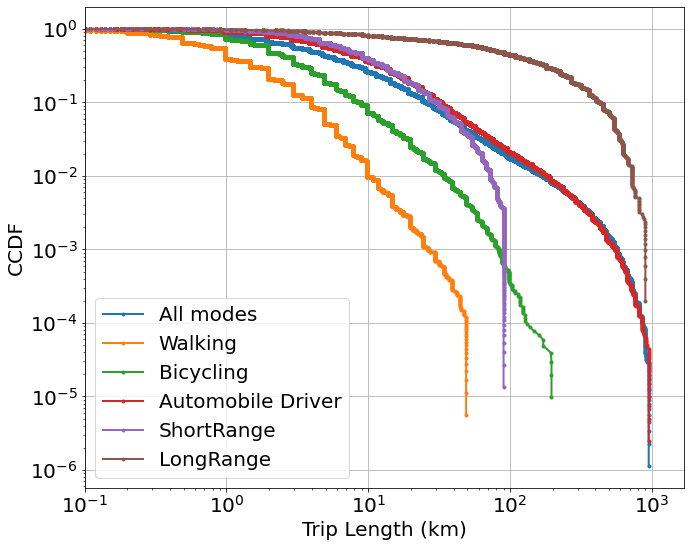

In [241]:
df_MiD_total=pd.concat([df_MiD_walk,df_MiD_bike,df_MiD_autopass,df_MiD_autodriver,df_MiD_public])
datalist=[df_MiD_total['wegkm'],df_MiD_walk['wegkm'],df_MiD_bike['wegkm'],df_MiD_autodriver['wegkm'],df_MiD_SRpublic['wegkm'],df_MiD_LRpublic['wegkm']]
labels=['All modes','Walking','Bicycling','Automobile Driver','ShortRange','LongRange']
ccdf_draw(datalist,labels)

### NHTS17 data
Travel behavior of the American public

In [8]:
# data reading

df_Nhts=pd.read_csv('data/trippub.csv',decimal='.',sep=',',usecols=["TRPMILES", "TRPTRANS","WHYTRP1S"])

df_Nhts.head(10)

,TRPMILES,TRPTRANS,WHYTRP1S
0,5.244,3,20
1,5.149,3,1
2,84.004,6,1
3,81.628,6,10
4,2.250,3,20
5,2.243,3,1
6,8.017,6,10
7,8.017,6,1
8,3.395,4,50
9,3.395,4,1


In [135]:
df_Nhts.shape

(923572, 3)

In [9]:
df_Nhts_walk =df_Nhts['TRPMILES'][df_Nhts.TRPTRANS.isin([1]) == True]*1.60934 # Walk and transform to km
df_Nhts_bike = df_Nhts['TRPMILES'][df_Nhts.TRPTRANS.isin([2]) == True]*1.60934 # Bicycle and transform to km
#3auto 4suv 5van 6rentalcar
df_Nhts_auto=df_Nhts['TRPMILES'][df_Nhts.TRPTRANS.isin([3,4,5,18])==True]*1.60934   #Auto
# Public Transport short range
#10school bus, 11public bus, 12paratransit / dial-a-ride, 13private/charter/tour/shutnhtse bus, 15amtrack / commuter rail, 16subway, 17taxi /limo (incl uber)
df_Nhts_SRpublic=df_Nhts['TRPMILES'][df_Nhts.TRPTRANS.isin([10,11,12,13,15,16,17])==True]*1.60934  
# long range
#14City-to-city bus (Greyhound, Megabus), 19Airplane, 20Boat/ferry/water taxi
df_Nhts_LRpublic=df_Nhts['TRPMILES'][df_Nhts.TRPTRANS.isin([14,19,20])==True]*1.60934  
df_Nhts_total=pd.concat([df_Nhts_walk,df_Nhts_bike,df_Nhts_auto,df_Nhts_SRpublic,df_Nhts_LRpublic])

In [242]:
def ccdf_draw(datalist,labels):
    fig, ax = plt.subplots(figsize=(10,8))
    for i,data in enumerate(datalist):
        sorted_data = np.sort(data)
        linspaced = np.linspace(0, 1, len(data), endpoint=False)
#         print(np.interp(3, sorted_data,linspaced))
        
        ax.plot(sorted_data, 1-linspaced, 'o-',label=labels[i],rasterized=False,markersize=3)
    plt.xlabel('Trip Length (km)')
    plt.ylabel('CCDF')
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
#     plt.ylim(1e-04,1e+0),  # untere+obere grenze von y
    plt.xlim(left=1e-1)  # untere+obere grenze von x
    plt.grid()
#     plt.show()
#     plt.ylim((0,1))
    plt.tight_layout()
    plt.savefig(res+'CCDF in NHTS.pdf', dpi=100, bbox_inches='tight')


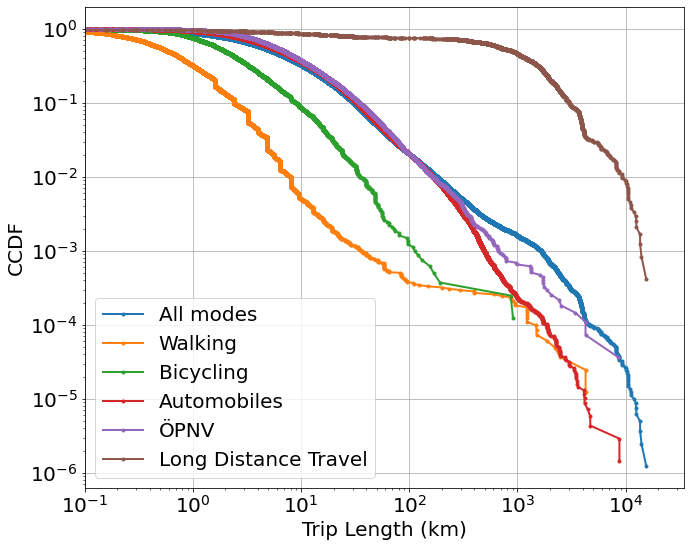

In [243]:
datalist=[df_Nhts_total,df_Nhts_walk,df_Nhts_bike,df_Nhts_auto,df_Nhts_SRpublic,df_Nhts_LRpublic]
labels=['All modes','Walking','Bicycling','Automobiles','ÖPNV','Long Distance Travel']
ccdf_draw(datalist,labels)

## Modelling

In [299]:
# df_vec=df_MiD_autodriver['wegkm'].copy() # Auto Driver in MiD 2017
# df_vec=df_MiD_SRpublic['wegkm'].copy() #Short range public in MiD 2017
df_vec=df_MiD_bike['wegkm'].copy() # bike in MiD 2017

# df_vec=df_Nhts_auto.copy() #Auto Driver in Nhts 17
# df_vec=df_Nhts_SRpublic.copy() #Short range public in Nhts17
# df_vec=df_Nhts_bike.copy() # bike in Nhts17

#number of trips to be generated for each parameter combination. high influence on calculation time!
sampleNumber=400

#trip lengths at which the difference between df_vec and model output is determined and summed up
# messpt=[1, 3, 5.5, 10, 30, 55, 100, 300] # for autodriver in MiD 2017
# messpt=[1, 3, 10, 30, 55,75] # for short range public in MiD 2017 since the max length in this dataset smaller than 100
messpt=[ 1,3,5,7,10,30,55,70,100,150] # for bike in MiD 2017

# messpt=[ 10, 55, 100, 300,700,1000,5000,7000] # for auto and short range in nhts 17
# messpt=[ 1,3,5,7,10,30,55,70,100,200] # for bike in nhts 17

df_vec.shape

(102237,)

In [300]:
#definition
eps_range=np.arange(0,2,0.05)
p_range=np.arange(0.1, 0.95, 0.05)#0.05
alp_range=np.arange(1.1, 2.5,0.05)#0.05
err=[0]
combinable=[[eps,p,alp,0] for eps in eps_range for p in p_range for alp in alp_range for error in err] #list
for i in range(2):
    print (combinable[i])

[0.0, 0.1, 1.1, 0]
[0.0, 0.1, 1.1500000000000001, 0]


In [301]:
%%time

for i in range(len(combinable)):
    if i%300==0:
        print(i)
        print ("Current date and time : ",datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    eps=combinable[i][0]
    p=combinable[i][1]
    alp=combinable[i][2]
    error=combinable[i][3]
    dist=[]
    for n in range(sampleNumber):
        distance=9999999
        # 1000 for MiD dataset
        #while(distance>=1000):
        #distance > 10000 for nhts dataset
        while(distance>=200):
            # np.random.uniform(0,1,1) generates one uniform random number between 0 and 1.
            # let sp be drawn from pow(alpha)
            sp=np.random.uniform(0,1,1)**(-1/(alp-1))
            random=np.random.uniform(0,1,1)
            distance=sp[0]
            while (random<p):
                distance=(1+eps)*distance
                random=np.random.uniform(0,1,1)
        dist.append(distance)
        
    for e in messpt:
#         print(ECDF(dist)(e))
#         print(ECDF(df_vec)(e))
#         print(1-ECDF(df_vec)(e))
#         print(e,'------')
        error=error+((((ECDF(dist)(e)-ECDF(df_vec)(e))**2)**0.5)/(1-ECDF(df_vec)(e)))
    combinable[i][3]=error

0
Current date and time :  2022-10-31 23:13:46
300
Current date and time :  2022-10-31 23:14:17
600
Current date and time :  2022-10-31 23:14:49
900
Current date and time :  2022-10-31 23:15:19
1200
Current date and time :  2022-10-31 23:16:04
1500
Current date and time :  2022-10-31 23:16:39
1800
Current date and time :  2022-10-31 23:17:11
2100
Current date and time :  2022-10-31 23:17:43
2400
Current date and time :  2022-10-31 23:18:18
2700
Current date and time :  2022-10-31 23:18:47
3000
Current date and time :  2022-10-31 23:19:22
3300
Current date and time :  2022-10-31 23:19:56
3600
Current date and time :  2022-10-31 23:20:30
3900
Current date and time :  2022-10-31 23:21:05
4200
Current date and time :  2022-10-31 23:21:40
4500
Current date and time :  2022-10-31 23:22:16
4800
Current date and time :  2022-10-31 23:22:54
5100
Current date and time :  2022-10-31 23:23:27
5400
Current date and time :  2022-10-31 23:24:04
5700
Current date and time :  2022-10-31 23:24:40
6000
C

In [302]:
# Convert to df and save
df_com=pd.DataFrame(combinable)

# df_com.to_pickle(res+'model paras of AutoDriver in MiD17.pkl')
# df_com=pd.read_pickle(res+'model paras of AutoDriver in MiD17.pkl')

# df_com.to_pickle(res+'model paras of ShortRange in MiD17.pkl')
#read and convert back
# df_com=pd.read_pickle(res+'model paras of ShortRange in MiD17.pkl')

df_com.to_pickle(res+'model paras of Bike in MiD17.pkl')
# df_com=pd.read_pickle(res+'model paras of Bike in MiD17.pkl')


# df_com.to_pickle(res+'model paras of AutoDriver in Nhts17.pkl')
# df_com=pd.read_pickle(res+'model paras of AutoDriver in Nhts17.pkl')

# df_com.to_pickle(res+'model paras of ShortRange in Nhts17.pkl')
# df_com=pd.read_pickle(res+'model paras of ShortRange in Nhts17.pkl')

# df_com.to_pickle(res+'model paras of Bike in Nhts17.pkl')
# df_com=pd.read_pickle(res+'model paras of Bike in Nhts17.pkl')
combinable=df_com.values.tolist()

In [303]:
'''distance vector generation
input:
    eps
    p
    alpha
    
output:
    dist: distance vector
'''
def dist_vec_gen(sampleNumber,eps,p,alp):
    
    dist=[]
    for n in range(sampleNumber):
        distance=9999999
#         while(distance>=1000):
#         while(distance>=10000): #for nhts17 dataset
        while(distance>=200): #for mid dataset: bike
            # np.random.uniform(0,1,1) generates one uniform random number between 0 and 1.
            # let sp be drawn from pow(alpha)
            sp=np.random.uniform(0,1,1)**(-1/(alp-1))
            random=np.random.uniform(0,1,1)
            distance=sp[0]
            while (random<p):
                distance=(1+eps)*distance
                random=np.random.uniform(0,1,1)
        dist.append(distance)
    return dist


In [304]:
#line 0 auto driver

#line 1 handpicked
eps1=2
p1=0.7
alp1=1.1
dist1= dist_vec_gen(sampleNumber,eps1,p1,alp1)


# convert to numpy array
com=np.array(combinable)
print(com.shape)

#line 2 best fit
# which error is the lowest
idx_best=com[:,3].argmin()
eps2 = com[idx_best,0]
p2 = com[idx_best,1]
alp2 = com[idx_best,2]
dist2= dist_vec_gen(sampleNumber,eps2,p2,alp2)

#line 3 worst fit
idx_worst=com[:,3].argmax()
eps3 = com[idx_worst,0]
p3 = com[idx_worst,1]
alp3 = com[idx_worst,2]
dist3= dist_vec_gen(sampleNumber,eps3,p3,alp3)

(19040, 4)


In [247]:
# autodriver in MiD 2017
print(com[:,3].min(),com[:,3].max())
print(eps1,p1,alp1,eps2,p2,alp2,eps3,p3,alp3)

0.911323857533286 105.82166593731804
2 0.7 1.1 0.35000000000000003 0.7500000000000002 2.100000000000001 1.3 0.9000000000000002 1.1


In [256]:
# Short range public in MiD 2017
print(com[:,3].min(),com[:,3].max())
print(eps1,p1,alp1,eps2,p2,alp2,eps3,p3,alp3)

1.5058163562686924 94.0877277719395
2 0.7 1.1 0.15000000000000002 0.7000000000000002 1.9500000000000008 1.6 0.9000000000000002 1.1


In [305]:
#Bike MiD2017
print(com[:,3].min(),com[:,3].max())
print(eps1,p1,alp1,eps2,p2,alp2,eps3,p3,alp3)

3.288817073050719 2794.392094461695
2 0.7 1.1 0.8 0.20000000000000004 2.250000000000001 1.1500000000000001 0.8500000000000002 1.1


In [270]:
# autodriver in Nhts17
print(com[:,3].min(),com[:,3].max())
print(eps1,p1,alp1,eps2,p2,alp2,eps3,p3,alp3)

4.735972294671592 79207.5322810473
2 0.7 1.1 0.2 0.1 1.7000000000000006 1.55 0.9000000000000002 1.1500000000000001


In [279]:
#short range Nhts17
print(com[:,3].min(),com[:,3].max())
print(eps1,p1,alp1,eps2,p2,alp2,eps3,p3,alp3)

4.626965372099182 6814.1343928215965
2 0.7 1.1 0.05 0.9000000000000002 1.8500000000000008 1.1 0.9000000000000002 1.1


In [289]:
#Bike Nhts17
print(com[:,3].min(),com[:,3].max())
print(eps1,p1,alp1,eps2,p2,alp2,eps3,p3,alp3)

3.08572583406345 547.2482490075568
2 0.7 1.1 0.65 0.25000000000000006 2.100000000000001 1.9000000000000001 0.9000000000000002 1.1


In [306]:
def ccdf_draw(datalist,labels):
    fig, ax = plt.subplots(figsize=(10,8))
    for i,data in enumerate(datalist):
        sorted_data = np.sort(data)
        linspaced = np.linspace(0, 1, len(data), endpoint=False)
#         print(np.interp(3, sorted_data,linspaced))
        
        ax.plot(sorted_data, 1-linspaced, 'o-',label=labels[i],rasterized=False,markersize=3)
    plt.xlabel('Trip Length (km)')
    plt.ylabel('CCDF')
    plt.legend()
    plt.yscale("log")
    plt.xscale("log")
#     plt.ylim(1e-04,1e+0),  # untere+obere grenze von y
#     plt.xlim(1e-1,1e+3),  # untere+obere grenze von x
    plt.xlim(left=1e-0)
    plt.grid()
#     plt.show()
#     plt.ylim((0,1))
    plt.tight_layout()
#     plt.savefig('CCDF of Modelling in MiD_AutoDriver.pdf', dpi=100, bbox_inches='tight')
#     plt.savefig(res+'CCDF of Modelling in MiD_ShortRange.pdf', dpi=100, bbox_inches='tight')
    plt.savefig(res+'CCDF of Modelling in MiD_Bike.pdf', dpi=100, bbox_inches='tight')
#     plt.savefig(res+'CCDF of Modelling in Nhts_AutoDriver.pdf', dpi=100, bbox_inches='tight')
#     plt.savefig(res+'CCDF of Modelling in Nhts_ShortRange.pdf', dpi=100, bbox_inches='tight')
#     plt.savefig(res+'CCDF of Modelling in Nhts_Bike.pdf', dpi=100, bbox_inches='tight')



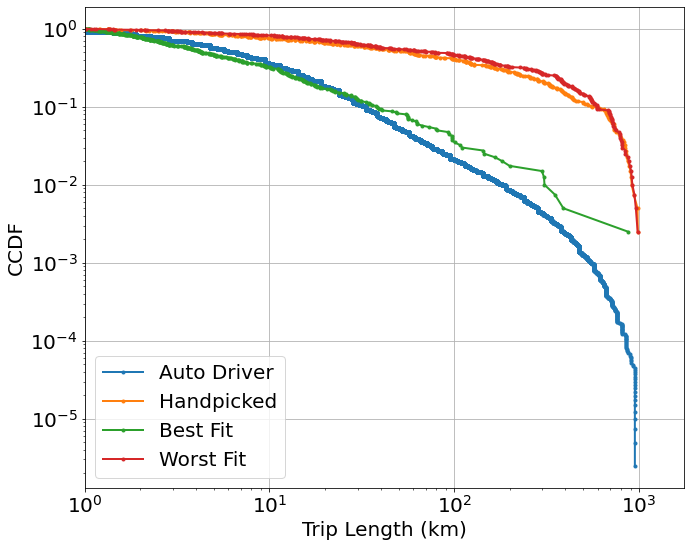

In [249]:
'''
MiD2017_AutoDriver
'''
datalist=[df_vec,dist1,dist2,dist3]
labels=['Auto Driver','Handpicked','Best Fit','Worst Fit']
ccdf_draw(datalist,labels)

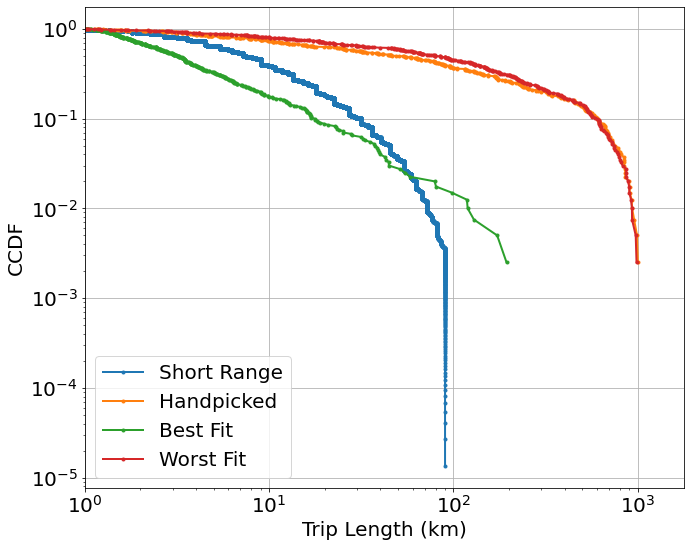

In [258]:
'''
MiD2017_ShortRange
'''
datalist=[df_vec,dist1,dist2,dist3]
labels=['Short Range','Handpicked','Best Fit','Worst Fit']
ccdf_draw(datalist,labels)

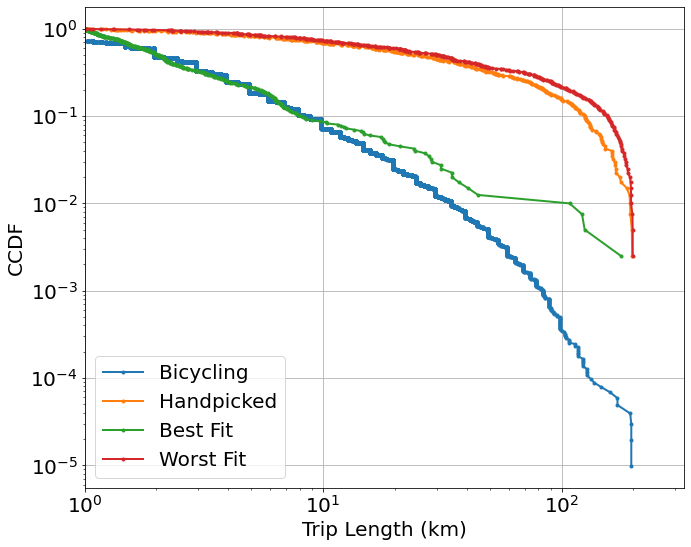

In [307]:
'''
MiD_Bike
'''
datalist=[df_vec,dist1,dist2,dist3]
labels=['Bicycling','Handpicked','Best Fit','Worst Fit']
ccdf_draw(datalist,labels)

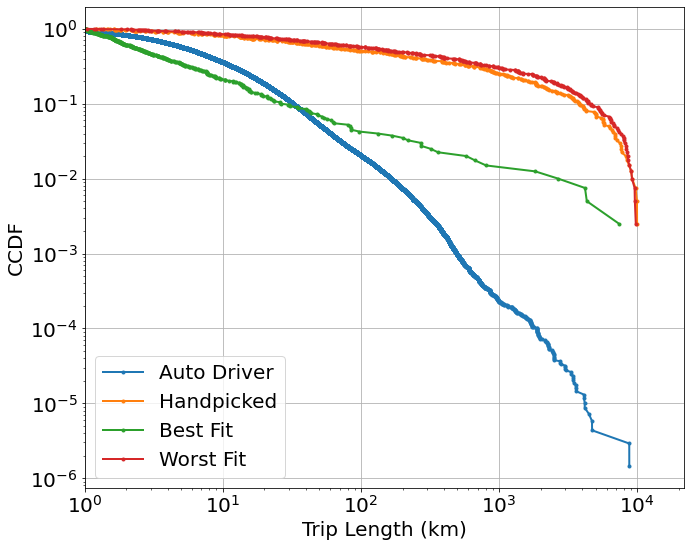

In [272]:
'''
Nhts17_AutoDriver
'''
datalist=[df_vec,dist1,dist2,dist3]
labels=['Auto Driver','Handpicked','Best Fit','Worst Fit']
ccdf_draw(datalist,labels)

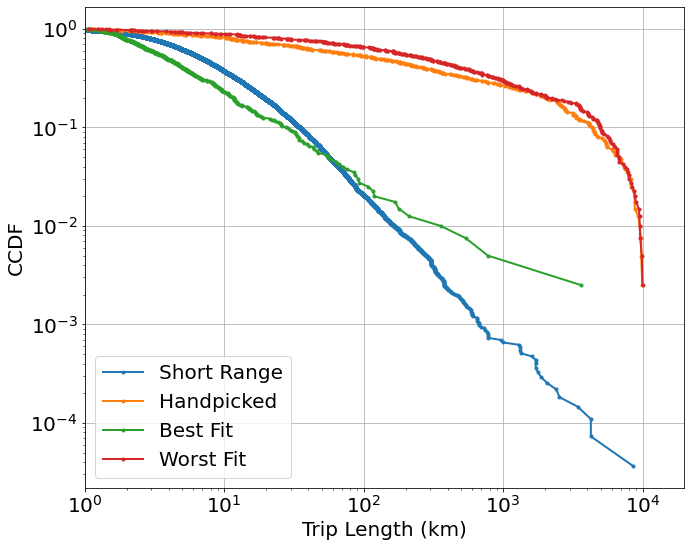

In [281]:
'''
Nhts17_ShortRange
'''
datalist=[df_vec,dist1,dist2,dist3]
labels=['Short Range','Handpicked','Best Fit','Worst Fit']
ccdf_draw(datalist,labels)

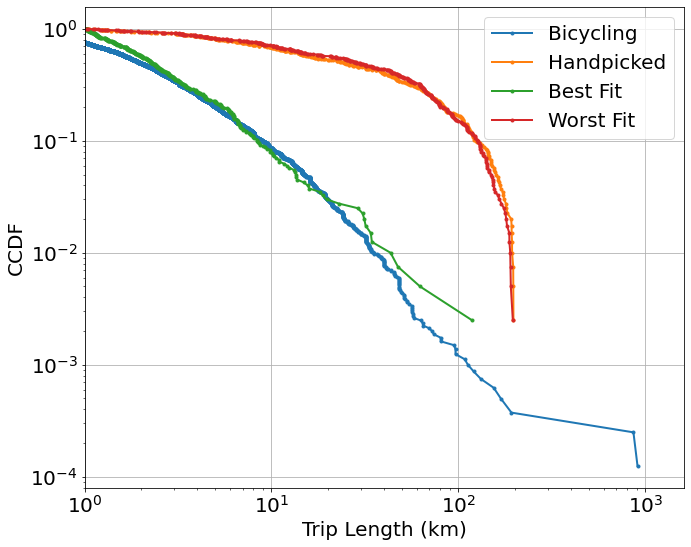

In [295]:
'''
Nhts17_Bike
'''
datalist=[df_vec,dist1,dist2,dist3]
labels=['Bicycling','Handpicked','Best Fit','Worst Fit']
ccdf_draw(datalist,labels)